# Introducción

En este notebook se desarrollan cuatro formas formas de estimar los parámetros de una regresión lineal simple ($\beta_0$,$\beta_1$ y $\sigma$). Vamos a utilizar los siguientes métodos para calcular los parámetros

* Fórmulas explícitas
* Proyección ortogonal (matrices)
* Librería Statsmodels
* Librería Scikit-Learn

En esta seción se importan las librerías y se genera un conjunto de datos $(X,y)$ sobre los que se va a realizar la estimación de los parámetros. Primero se genera la variable independiente $x$ y se construye la matriz

\begin{align}
        X = \begin{pmatrix}
        1 & x_1 &  \\
        1 & x_2 & \\
        ... & ... \\
        1 & x_n
        \end{pmatrix}
    \end{align}


Después, a partir de los parámetros $\beta_0$, $\beta_1$ y $\sigma$ generamos la variable dependiente $y$ con el modelo

\begin{align}
      y_i=\beta_0 + \beta_1 x_i + \epsilon_i
      \end{align}

Donde $\epsilon_i$ son $iid$  $N(0,\sigma^2)$

Después guardamos el resultado de la simulación en el vector $y$

\begin{align}
        y = \begin{pmatrix}
        y_1 \\
        y_2 \\
        ...\\
        y_n
        \end{pmatrix}
    \end{align}




In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


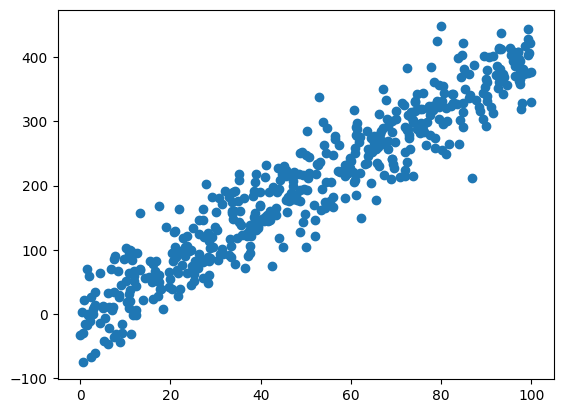

In [2]:
# Generar los datos

# Numero de observaciones
observaciones=500

# Valores de x
x=np.random.random(observaciones)*100

# Parámetros del modelo, beta0, beta1 y sigma
parametros=np.array([1,4])
sigma=40

# Variable dependiente
y=parametros[0]+parametros[1]*x + np.random.normal(0,sigma,observaciones)

# Hacer un gráfico de los datos
plt.scatter(x,y);



# Fórmulas explicitas

Las fórmulas utilizadas para la estimación de los parámetros son:


Primero realizamos los cálculos intermedios

\begin{align}
      S_{xy}=\frac{1}{n}\sum_{i=1}^{n}x_iy_i-\overline{x}\overline{y}
      \end{align}

\begin{align}
  S_{xx}=\frac{1}{n}\sum_{i=1}^{n}x_i^2-\overline{x}^2
     \end{align}

Para calcular las betas:

\begin{align}
  \beta_1=\frac{S_{xy}}{S_{xx}}
     \end{align}
\begin{align}
  \beta_0=\overline{y}-\beta_1\overline{x}
       \end{align}

El parámetro $\sigma$ lo estimamos como la raiz cuadrada de la suma de los residuos al cuadrado dividido por los grados de libertad



\begin{align}
  \sigma=\sqrt{\frac{\sum_{i=1}^{n}(y_i-\beta_0-\beta_1x_i)^2}{n-2}}
       \end{align}



In [3]:
# Fórmulas explícitas

# Estimación de beta1
sxy=1/observaciones*np.dot(x,y)-np.mean(x)*np.mean(y)
sxx=1/observaciones*np.dot(x,x)-np.mean(x)**2
beta1=sxy/sxx

# Estimación de beta0
beta0=np.mean(y)-beta1*np.mean(x)

# Estimación de sigma^2
residuos=y-beta0-beta1*x
sigma=np.sqrt(sum(residuos**2)/(observaciones-2))

# Guardar resultado
parametros_formulas=[beta0,beta1,sigma]
parametros_formulas


[-3.4529430281402256, 4.035856426661762, 38.70843348738895]

# Proyección ortogonal (matrices)

En este caso proyectamos ortogonalmente el vector de observaciones $y$ en el espacio vectorial generado por el vector $x$ y un vector de $unos$. El vector $y$ que obtenemos de la proyección ortogonal es $$\hat{y}$$ y los coeficientes de la combinación lineal de la proyección son las betas

En fórmulas: $$\hat{y}=X\beta$$


PAra ello vamos a construir la matriz $X$ de n filas y dos columnas formada por el vector de unos y la variable independiente $x$, $$X=[unos,x]$$

Entonces el modelo lo podemos escribir así

\begin{align}
  y=X\beta+𝛆
   \end{align}

Asumiendo que se verifican las condiciones del modelo regresión lineal (probabilístico), entonces los errores son independientes de las observaciones, por lo que se cumplen las condiciones de ortogonalidad con los vectores de la matriz $X$, es decir, $X'𝜀=0$, (las condiciones de ortogonalidad o de independencia de los residuos son (i) la suma de residuos es igual a cero y (ii) la suma de $x_i𝜀=0$ residuos son ortogonales a la variable independiente)

Despejando ya fórmula anterior teniendo en cuenta que $X'𝜀=0$, se obtiene

\begin{align}
    \beta=(X'X)^{-1}X'Y
      \end{align}

Lo que nos permite obtener las betas directamente.


Para calcular el parámetro $\sigma$ utilzamos la misma fórmula que en el apartado anterior, es decir, la raiz cuadrada de la suma de los residuos al cuadrado dividido por los grados de libertad, como en el apartado anterior


In [4]:
# Añadir un vector de unos para crear la matriz X

# Crear el vector de unos de longitud igual al número de observaciones
unos=np.ones(len(x))

# Juntar el vector de unos con el vector de observaciones para crear la matriz X
X=np.column_stack((unos,x))

# Obtener las tres primeras filas de la matriz X
X[:3,:]

array([[ 1.        , 37.99077528],
       [ 1.        , 90.1682335 ],
       [ 1.        , 10.22139476]])

In [5]:
# Cálculo de las betas
betas=np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)

# Cálculo de sigma
residuos=y-np.matmul(X,betas)
sigma=np.sqrt(sum(residuos**2)/(observaciones-2))

# Guardar resultado
parametros_matrices=np.append([betas], [sigma])
parametros_matrices

array([-3.45294303,  4.03585643, 38.70843349])

# Statsmodels

Los parámetros se estiman directamente con la sentencia correspondiente de StatsModels


In [6]:
# Importar la librería
import statsmodels.api as sm

# OJO hay que añadir el vector de unos
# Hay un método específico en stasmodels para añadir el vector de unos
X = sm.add_constant(x)

# Instanciar y ajustar el modelo
modelo = sm.OLS(y,X).fit()

# Imprimir los resultados
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     4358.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):          2.00e-248
Time:                        16:26:24   Log-Likelihood:                -2536.5
No. Observations:                 500   AIC:                             5077.
Df Residuals:                     498   BIC:                             5085.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4529      3.511     -0.983      0.3

In [7]:
# Obtener unicamente las betas
modelo.params

array([-3.45294303,  4.03585643])

In [8]:
# Obtener sigma (no hay un método directo)
# Obtener sse=sum squared error y luego calcular sigma

sigma_sm=np.sqrt(modelo.ssr/(observaciones-2))
sigma_sm

38.70843348738896

In [9]:
# Juntar las betas y sigma en un array

parametros_sm=np.append([modelo.params], [sigma_sm])
parametros_sm

array([-3.45294303,  4.03585643, 38.70843349])

# Scikit-Learn

También podemos calcular los parámetros de la regresión lineal con la librería `sklearn`



In [11]:
# Importar la librería
from sklearn import linear_model

# Preparar los datos (convertir x en una matriz nx1)
x = x.reshape(-1, 1)

# Instanciar el modelo
modelo = linear_model.LinearRegression()

# Ajustar el modelo
modelo.fit(x,y)

# Obtener los parámetros
print('beta0: ',modelo.intercept_,'\nbeta1: ', modelo.coef_)


beta0:  -3.452943028139913 
beta1:  [4.03585643]


In [12]:
# Sklearn no calcula sigma. Lo calculamos con la fórmula
sigma_sk=np.sqrt(sum((y-modelo.predict(x))**2)/(observaciones-2))
sigma_sk

38.70843348738897

In [13]:
# Crear un array con los tres parámetros. np.append admite solo dos arrays
# Para unir tres arrays, unimos dos y luego otro al resultado

parametros_sk=np.append(np.append([modelo.intercept_],[modelo.coef_]),[sigma_sk])
parametros_sk

array([-3.45294303,  4.03585643, 38.70843349])

# Resumen de los parámetros

Los parámetros iniciales son los parámetros "verdaderos", $$(\beta_0,\beta_1,\sigma)$$

En un problema real, los parámetros "verdaderos" se supone que existen, pero no son observables.

Los parámetros que se obtienen son estimaciones de los prámetros "verdaderos".

$$(\hat{\beta_0},\hat{\beta_1},\hat{\sigma}) $$




In [15]:
print("Los parámetros (beta_0, beta_1, sigma)")
print("Con formulas: ", parametros_formulas)
print("Con matrices: ", parametros_matrices)
print("Con statsmodels: ", parametros_sm)
print("Con Scikit-Learn: ", parametros_sk)

Los parámetros (beta_0, beta_1, sigma)
Con formulas:  [-3.4529430281402256, 4.035856426661762, 38.70843348738895]
Con matrices:  [-3.45294303  4.03585643 38.70843349]
Con statsmodels:  [-3.45294303  4.03585643 38.70843349]
Con Scikit-Learn:  [-3.45294303  4.03585643 38.70843349]
